# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data", index_col = 0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("TARGET CLASS",axis = 1))
scaled_features = scaler.transform(df.drop("TARGET CLASS", axis = 1))

In [4]:
scaled_features[0]

array([-0.12354188,  0.18590747, -0.91343069,  0.31962911, -1.03363681,
       -2.3083747 , -0.79895135, -1.48236813, -0.9497194 , -0.64331425])

In [5]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,df["TARGET CLASS"],test_size=0.30)

# Applying KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [10]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
pred = knn.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(confusion_matrix(Y_test,pred))

[[135  17]
 [ 12 136]]


In [14]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       152
           1       0.89      0.92      0.90       148

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# Choosing K value

In [15]:
error_rate = []

for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

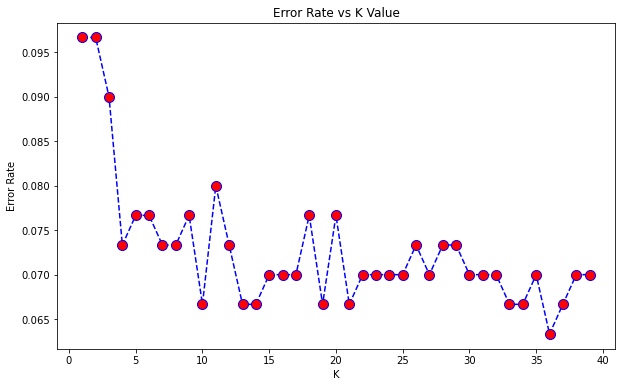

In [16]:
plt.figure(figsize = (10,6))
plt.plot( range(1,40),error_rate, color = "blue", linestyle="dashed", marker = "o",
        markerfacecolor = "red", markersize = 10)
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [17]:
knn = KNeighborsClassifier(n_neighbors = 36)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print("K set to 36\n")
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

K set to 36

[[142  10]
 [  9 139]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       152
           1       0.93      0.94      0.94       148

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

